In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD

%reset

# 1. Raw Data Loading
ozone = pd.read_csv('/content/drive/MyDrive/KDT/data/ozone.csv')
display(ozone.head())

# 2. Data Preprocessing
# 결치값만 삭제하고 넘어간다...
df = ozone[['Temp', 'Ozone']]
new_df = df.dropna(how='any', inplace=False)

# 3. 학습데이터 분리
x_data = new_df['Temp'].values.reshape(-1, 1)
t_data = new_df['Ozone'].values.reshape(-1, 1)

# 4. Model 구현
keras_model = Sequential()
input_layer = Flatten(input_shape=(1,))
output_layer = Dense(units=1, activation='linear')

keras_model.add(input_layer)
keras_model.add(output_layer)

# 만들어진 모델에 대한 설정
keras_model.compile(optimizer=SGD(learning_rate=1e-4), loss='mse')

# 5. Model 학습
keras_model.fit(x_data, t_data, epochs=1000, verbose=1)

In [ ]:
# 모델 구현이 끝났으니 이제 Prediction(예측)을 해보아요!
keras_result = keras_model.predict(np.array([[62]]))
print(keras_result)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
[[35.367077]]


In [ ]:
# sklearn을 이용해서 모델 학습을 시킨 후
# 모델 그림을 그려서 tensorflow와 비교해 볼거에요!
from sklearn import linear_model

# 모델 구현
sklearn_model = linear_model.LinearRegression()
sklearn_model.fit(x_data, t_data)

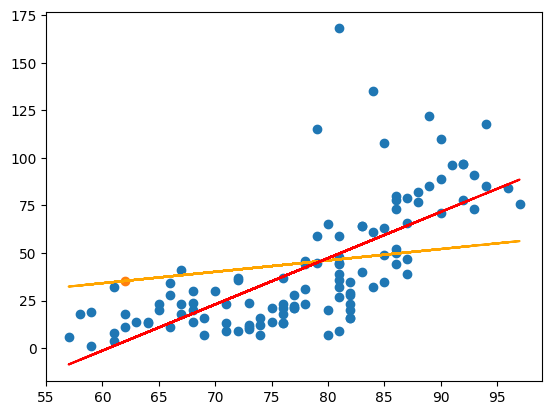

In [ ]:
# 그림을 그려서 우리 모델이 잘 작성되었는지 확인!
plt.scatter(x_data.ravel(), t_data.ravel())
plt.scatter(np.array([[62]]).ravel(), keras_result.ravel())

# 우리 keras 모델에서 구한 W와 b값을 이용해서 모델(직선)을 그려보아요!
keras_weight, keras_bias = output_layer.get_weights()
plt.plot(x_data.ravel(), x_data.ravel() * keras_weight.ravel() + keras_bias, color='orange')

# sklearn으로 모델을 구한 후 그림을 그려요!
plt.plot(x_data.ravel(), x_data.ravel() * sklearn_model.coef_.ravel() + sklearn_model.intercept_.ravel(), color='r')
plt.legend(('Tensorflow', 'sklearn'))
plt.show()

In [ ]:
# sklearn 구현 (정답에 가장 가까워요!)
# Tensorflow 구현
# Python 직접 구현

# Tensorflow 구현과 Python 직접 구현은 정답과 약간 거리가 있어요!
# 가장 큰 이유는 데이터 전처리에 있어요!

# 결측치 처리
# 이상치 처리
# 정규화 처리 (이상치에 영향을 받아요!)

8.0
4.5
11.5
22.0 -6.0
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14.]


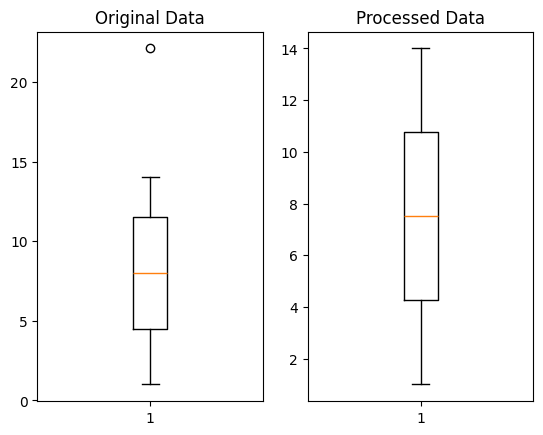

In [ ]:
# Tukey's Fence 방식으로 이상치를 판별해 보아요!
import matplotlib.pyplot as plt
import numpy as np

data = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 22.1])

fig = plt.figure()
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.set_title('Original Data')
ax1.boxplot(data)

# NumPy를 이용하면 사분위 값을 아주 쉽게 구할 수 있어요!
print(np.median(data)) # 8.0 2사분위
print(np.percentile(data, 25)) # 2.5 1사분위
print(np.percentile(data, 75)) # 11.5 3사분위

# IQR Value
iqr_value = np.percentile(data, 75) - np.percentile(data, 25)

# Upper Fence (upper_fence보다 큰 수는 상위 이상치!)
upper_fence = np.percentile(data, 75) + (iqr_value * 1.5)
# Lower Fence (lower_fence보다 작은 수는 하위 이상치!)
lower_fence = np.percentile(data, 25) - (iqr_value * 1.5)
print(upper_fence, lower_fence) # 22.0 -6.0

# 내가 가지고 있는 데이터에서 이상치만 출력해보아요!
# data[(data > upper_fence) | (data < lower_fence)]
result_data = data[(data <= upper_fence) & (data >= lower_fence)] # 이상치 제거
print(result_data)

ax2.set_title('Processed Data')
ax2.boxplot(result_data)

plt.show()

50.5
43.75
56.25
75.0 25.0
[30 35 40 45 48 49 50 51 52 53 55 60 65]


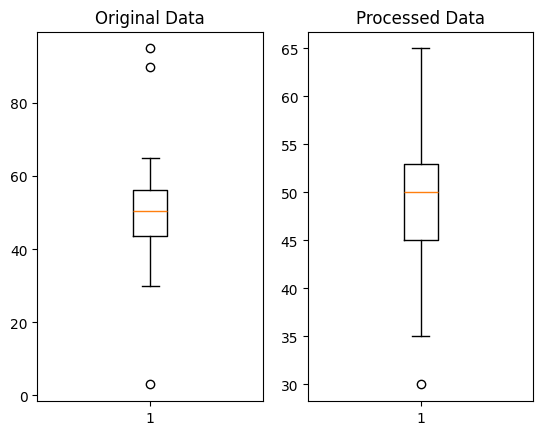

In [ ]:
# 데이터를 다르게 해서 먼저 Tukey's Fence로 이상치를 찾아보아요!
import numpy as np

data = np.array([3, 30, 35, 40, 45, 48, 49, 50, 51, 52, 53, 55, 60, 65, 90, 95])

fig = plt.figure()
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.set_title('Original Data')
ax1.boxplot(data)

# NumPy를 이용하면 사분위 값을 아주 쉽게 구할 수 있어요!
print(np.median(data)) # 50.5 2사분위
print(np.percentile(data, 25)) # 43.75 1사분위
print(np.percentile(data, 75)) # 56.25 3사분위

# IQR Value
iqr_value = np.percentile(data, 75) - np.percentile(data, 25)

# Upper Fence (upper_fence보다 큰 수는 상위 이상치!)
upper_fence = np.percentile(data, 75) + (iqr_value * 1.5)
# Lower Fence (lower_fence보다 작은 수는 하위 이상치!)
lower_fence = np.percentile(data, 25) - (iqr_value * 1.5)
print(upper_fence, lower_fence) # 75.0 25.0

# 내가 가지고 있는 데이터에서 이상치만 출력해보아요!
# data[(data > upper_fence) | (data < lower_fence)]
result_data = data[(data <= upper_fence) & (data >= lower_fence)] # 이상치 제거
print(result_data)

ax2.set_title('Processed Data')
ax2.boxplot(result_data)

plt.show()

In [ ]:
# 같은 데이터를 Z-Score를 이용한 방법으로
# 이상치 처리를 해보아요!
from scipy import stats

data = np.array([3, 30, 35, 40, 45, 48, 49, 50, 51, 52, 53, 55, 60, 65, 90, 95])

zscore_threshold = 2.0

print(stats.zscore(data))
# [-2.32218008 -1.02440286 -0.78407374 -0.54374462 -0.30341551 -0.15921804
#  -0.11115222 -0.06308639 -0.01502057  0.03304525  0.08111108  0.17724272
#   0.41757184  0.65790095  1.85954653  2.09987565]

print(~(np.abs(stats.zscore(data)) > zscore_threshold)) # Boolean Mask
print(data[~(np.abs(stats.zscore(data)) > zscore_threshold)]) # Boolean Indexing

[-2.32218008 -1.02440286 -0.78407374 -0.54374462 -0.30341551 -0.15921804
 -0.11115222 -0.06308639 -0.01502057  0.03304525  0.08111108  0.17724272
  0.41757184  0.65790095  1.85954653  2.09987565]
[False  True  True  True  True  True  True  True  True  True  True  True
  True  True  True False]
[30 35 40 45 48 49 50 51 52 53 55 60 65 90]


In [ ]:
# 온도에 따른 오존량 데이터에 대해
# 이상치 처리를 한 후
# Tensorflow와 sklearn으로 Simple Linear Regression을
# 구현해서 62도에 대한 예측 오존값을 구해보세요!
# 그리고 수정된 데이터로 그래프도 그려서 확인해 보세요!
%reset

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Raw Data Loading
ozone = pd.read_csv('/content/drive/MyDrive/KDT/data/ozone.csv')
display(ozone.head())

# Data Preprocessing
# 결치값 처리
df = ozone[['Temp', 'Ozone']]
new_df = df.dropna(how='any', inplace=False)

# 이상치 처리 (Z-Score)
from scipy import stats

zscore_threshold = 2.0
print(stats.zscore(new_df['Ozone']))
print(~(np.abs(stats.zscore(new_df['Ozone'])) > zscore_threshold))
new_df = new_df[~(np.abs(stats.zscore(new_df['Ozone'])) > zscore_threshold)]
print(new_df)

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,NaN,NaN,14.3,56,5,5


0     -0.034383
1     -0.186611
2     -0.917307
3     -0.734633
5     -0.430176
         ...   
147   -0.856416
148   -0.369285
150   -0.856416
151   -0.734633
152   -0.673742
Name: Ozone, Length: 116, dtype: float64
0      True
1      True
2      True
3      True
5      True
       ... 
147    True
148    True
150    True
151    True
152    True
Name: Ozone, Length: 116, dtype: bool
     Temp  Ozone
0      67   41.0
1      72   36.0
2      74   12.0
3      62   18.0
5      66   28.0
..    ...    ...
147    63   14.0
148    70   30.0
150    75   14.0
151    76   18.0
152    68   20.0

[109 rows x 2 columns]


In [ ]:
# Tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD

x_data = new_df['Temp'].values.reshape(-1, 1)
t_data = new_df['Ozone'].values.reshape(-1, 1)

keras_model = Sequential()
input_layer = Flatten(input_shape=(1,))
output_layer = Dense(units=1, activation='linear')

keras_model.add(input_layer)
keras_model.add(output_layer)

keras_model.compile(optimizer=SGD(learning_rate=1e-4), loss='mse')

keras_model.fit(x_data, t_data, epochs=1000, verbose=1)

In [ ]:
keras_result = keras_model.predict(np.array([[62]]))
print(keras_result)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
[[25.519556]]


In [ ]:
# sklearn
from sklearn import linear_model

sklearn_model = linear_model.LinearRegression()
sklearn_model.fit(x_data, t_data)

sklearn_result = sklearn_model.predict(np.array([[62]]))
print(sklearn_result)

[[4.51299041]]


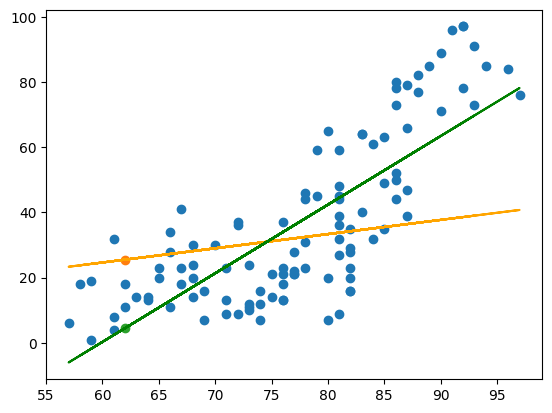

In [ ]:
plt.scatter(x_data.ravel(), t_data.ravel())
plt.scatter(np.array([[62]]).ravel(), keras_result.ravel())
plt.scatter(np.array([[62]]).ravel(), sklearn_result.ravel())

keras_weight, keras_bias = output_layer.get_weights()
plt.plot(x_data.ravel(), x_data.ravel() * keras_weight.ravel() + keras_bias, color='orange')
plt.plot(x_data.ravel(), x_data.ravel() * sklearn_model.coef_.ravel() + sklearn_model.intercept_.ravel(), color='g')
plt.legend(('Tensorflow', 'sklearn'))
plt.show()

In [ ]:
# 온도에 따른 오존량 데이터에 대해
# 이상치 처리를 한 후 정규화 처리도 해서
# Tensorflow와 sklearn으로 Simple Linear Regression을
# 구현해서 62도에 대한 예측 오존값을 구해보세요!
# 그리고 수정된 데이터로 그래프도 그려서 확인해 보세요!
%reset

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Raw Data Loading
ozone = pd.read_csv('/content/drive/MyDrive/KDT/data/ozone.csv')
display(ozone.head())

# Data Preprocessing
# 결치값 처리
df = ozone[['Temp', 'Ozone']]
new_df = df.dropna(how='any', inplace=False)

# 이상치 처리 (Z-Score)
from scipy import stats

zscore_threshold = 2.0
mask = ~(np.abs(stats.zscore(new_df['Ozone'])) > zscore_threshold)
new_df = new_df[mask]

# 정규화 처리 : 모든 데이터를 0~1 사이의 값으로 정규화
from sklearn.preprocessing import MinMaxScaler

scaler_x = MinMaxScaler()
scaler_t = MinMaxScaler()

scaler_x.fit(new_df['Temp'].values.reshape(-1, 1))
scaler_t.fit(new_df['Ozone'].values.reshape(-1, 1))

In [ ]:
# 학습데이터를 분리
x_data = new_df['Temp'].values.reshape(-1, 1)
t_data = new_df['Ozone'].values.reshape(-1, 1)

# 분리된 데이터를 정규화 진행
x_data_norm = scaler_x.transform(x_data)
t_data_norm = scaler_t.transform(t_data)

In [ ]:
# Tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD

keras_model = Sequential()
input_layer = Flatten(input_shape=(1,))
output_layer = Dense(units=1, activation='linear')

keras_model.add(input_layer)
keras_model.add(output_layer)

keras_model.compile(optimizer=SGD(learning_rate=1e-4), loss='mse')

keras_model.fit(x_data_norm, t_data_norm, epochs=500, verbose=1) # 정규화를 진행하였기 때문에 loss가 0에 근접하는 것을 볼 수있음.

In [ ]:
# 정규화 처리를하여 학습을 했기 때문에 62 그대로 넣으면 안됨!
# 결과도 정규화 처리된 상태로 나오기 때문에 복원 시켜줘야함!
my_data = np.array([[62]])
my_data_norm = scaler_x.transform(my_data)
keras_result_norm = keras_model.predict(my_data_norm)
keras_result = scaler_t.inverse_transform(keras_result_norm)

print(keras_result_norm)
print(keras_result)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
[[0.06973206]]
[[7.694277]]


In [ ]:
# sklearn - 정규화 굳이 안해도됨. 알아서 전처리 다 해줌!
from sklearn import linear_model

sklearn_model = linear_model.LinearRegression()
sklearn_model.fit(x_data, t_data)

sklearn_result = sklearn_model.predict(np.array([[62]]))
print(sklearn_result)

[[4.51299041]]


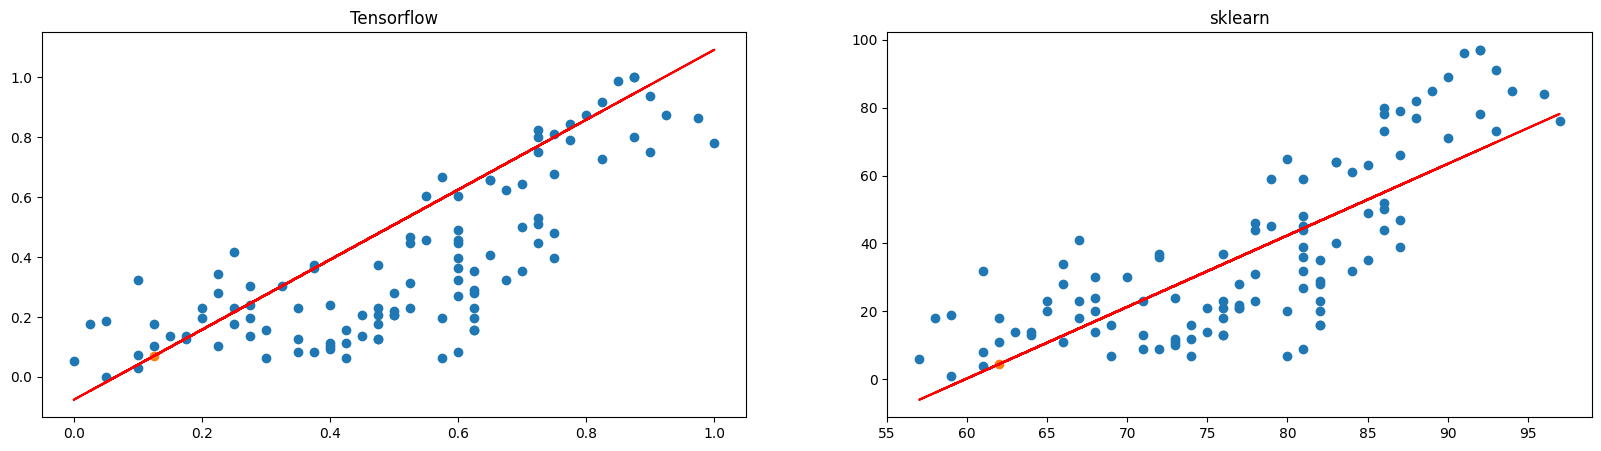

In [ ]:
fig = plt.figure(figsize=(20, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.set_title('Tensorflow')
ax1.scatter(x_data_norm.ravel(), t_data_norm.ravel())
ax1.scatter(my_data_norm.ravel(), keras_result_norm.ravel())

ax2.set_title('sklearn')
ax2.scatter(x_data.ravel(), t_data.ravel())
ax2.scatter(np.array([[62]]).ravel(), sklearn_result.ravel())

keras_weight, keras_bias = output_layer.get_weights()
ax1.plot(x_data_norm.ravel(), x_data_norm.ravel() * keras_weight.ravel() + keras_bias, color='r')
ax2.plot(x_data.ravel(), x_data.ravel() * sklearn_model.coef_.ravel() + sklearn_model.intercept_.ravel(), color='r')

plt.show()

In [ ]:
# Multiple Linear Regression 구현
# Ozone Data를 이용해서 구현
# 독립변수 3개 (태양광, 바람, 온도)
# 종속변수 1개 (오존)
# 태양광세기 : 150, 바람 : 10, 온도 : 80
# 인 경우 오존량은 얼마일까요?
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import stats
from sklearn.preprocessing import MinMaxScaler

from sklearn import linear_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD

In [ ]:
# 1. Raw Data Loading
ozone = pd.read_csv('/content/drive/MyDrive/KDT/data/ozone.csv')
display(ozone) # 153 rows × 6 columns

# 필요한 컬럼만 남기고 나머지 컬럼은 삭제
df = ozone[['Solar.R', 'Wind', 'Temp', 'Ozone']]
display(df) # 153 rows × 4 columns

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,NaN,NaN,14.3,56,5,5
...,...,...,...,...,...,...
148,30.0,193.0,6.9,70,9,26
149,NaN,145.0,13.2,77,9,27
150,14.0,191.0,14.3,75,9,28
151,18.0,131.0,8.0,76,9,29


,Solar.R,Wind,Temp,Ozone
0,190.0,7.4,67,41.0
1,118.0,8.0,72,36.0
2,149.0,12.6,74,12.0
3,313.0,11.5,62,18.0
4,NaN,14.3,56,NaN
...,...,...,...,...
148,193.0,6.9,70,30.0
149,145.0,13.2,77,NaN
150,191.0,14.3,75,14.0
151,131.0,8.0,76,18.0


In [ ]:
# 2. 데이터 전처리
# 2-1. 결측치 처리
new_df = df.dropna(how='any', inplace=False)
display(new_df) # 111 rows × 4 columns

# 2-2. 이상치 처리
zscore_threshold = 2.0
mask = np.abs(stats.zscore(new_df['Ozone'].values)) <= zscore_threshold
df1 = new_df.loc[mask]
display(df1) # 105 rows × 4 columns

# 2-3. 데이터 정규화 (x_data 나눌 필요없이 2차원 ndarray 그대로 넣으면 알아서 됨!)
# 먼저 x_data와 t_data를 분리
x_data = df1.drop('Ozone', axis=1, inplace=False).values
t_data = df1['Ozone'].values.reshape(-1, 1)

scaler_x = MinMaxScaler()
scaler_t = MinMaxScaler()

scaler_x.fit(x_data)
scaler_t.fit(t_data)

x_data_norm = scaler_x.transform(x_data)
t_data_norm = scaler_t.transform(t_data)
print(x_data_norm)

In [ ]:
# 3. Model 구현 & 예측
# 3-1. sklearn을 이용한 Model 구현
sklearn_model = linear_model.LinearRegression()
sklearn_model.fit(x_data, t_data)

sklearn_result = sklearn_model.predict(np.array([[150, 10, 80]]))
print(sklearn_result)

[[40.90068539]]


In [ ]:
# 3-2 Tensorflow keras를 이용한 Model 구현 & 예측
keras_model = Sequential()
keras_model.add(Flatten(input_shape=(3,)))
keras_model.add(Dense(units=1, activation='linear'))
keras_model.compile(optimizer=SGD(learning_rate=1e-2), loss='mse')
keras_model.fit(x_data_norm, t_data_norm, epochs=1000, verbose=1)

In [ ]:
data = np.array([[150, 10, 80]])
data_norm = scaler_x.transform(data)
keras_result_norm = keras_model.predict(data_norm)
keras_result = scaler_t.inverse_transform(keras_result_norm)
print(keras_result)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
[[40.412582]]


In [ ]:
import numpy as np
import pandas as pd

from scipy import stats

from sklearn.preprocessing import MinMaxScaler


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD

from sklearn import linear_model

import matplotlib.pyplot as plt

In [ ]:
# Raw Data Loading
df = pd.read_csv('/content/drive/MyDrive/KDT/data/ozone.csv')
print(df.shape)
training_data = df[['Temp','Ozone']]
training_data = training_data.dropna(how='any')
display(training_data.shape)  # (116, 2) 너무 많이 삭제됬습니다. 별로 좋지 않아요!

################################
# 이상치처리
zscore_threshold = 1.8 # zscore outliers 임계값 (2.0이하가 optimal)

# outliers 출력.
# Temp에 대한 이상치(지대점) 확인
outliers = training_data['Temp'][(np.abs(stats.zscore(training_data['Temp'])) > zscore_threshold)]
print(outliers)
# Temp에 대한 이상치(지대점) 제거한 결과
training_data = training_data.loc[~training_data['Temp'].isin(outliers)]
print(training_data.shape)  # (110, 2)

# Ozone에 대한 이상치(Outlier) 확인
outliers = training_data['Ozone'][(np.abs(stats.zscore(training_data['Ozone'])) > zscore_threshold)]
print(outliers)
# Ozone에 대한 이상치 제거한 결과
training_data = training_data.loc[~training_data['Ozone'].isin(outliers)]
print(training_data.shape)  # (103, 2)
################################


################################
# 정규화 처리(Min-Max Normalization)
# 직접 구현해도 되지만 sklearn을 이용해서 처리하자

scaler_x = MinMaxScaler()  # MinMaxScaler 클래스의 인스턴스 생성.
scaler_y = MinMaxScaler()  # MinMaxScaler 클래스의 인스턴스 생성.

scaler_x.fit(training_data['Temp'].values.reshape(-1,1))
scaler_y.fit(training_data['Ozone'].values.reshape(-1,1))

# Training Data Set

x_data = training_data['Temp'].values.reshape(-1,1)
t_data = training_data['Ozone'].values.reshape(-1,1)

x_data_norm = scaler_x.transform(x_data)
t_data_norm = scaler_y.transform(t_data)

(153, 6)


(116, 2)

7      59
14     58
17     57
20     59
119    97
121    96
Name: Temp, dtype: int64
(110, 2)
29     115.0
61     135.0
85     108.0
98     122.0
100    110.0
116    168.0
120    118.0
Name: Ozone, dtype: float64
(103, 2)


In [ ]:
# 수치미분함수
####################################

# numerical derivative function
def numerical_derivative(f,x):

    # f : 미분하려고 하는 다변수 함수
    # x : 모든 변수를 포함하고 있는 numpy array(차원상관없음)

    delta_x = 1e-4
    derivative_x = np.zeros_like(x)  # 계산된 수치미분 값을 저장하기 위한 변수

    # iterator를 이용하여 입력변수 x에 대해 편미분 수행
    it = np.nditer(x, flags=['multi_index'])

    while not it.finished:

        idx = it.multi_index   # 현재의 index를 추출 => tuple형태로 리턴

        tmp = x[idx]           # 현재 idx의 값을 잠시 보존. delta_x를 이용한 값으로
                               # ndarray를 수정한 후 함수값을 계산해야 하기 때문
                               # 함수값을 계산한 후 원상복구해야 다음 변수에 대한 편미분을
                               # 정상적으로 수행할 수 있다.

        x[idx] = tmp + delta_x
        fx_plus_delta = f(x)   # f(x + delta_x)

        x[idx] = tmp - delta_x
        fx_minus_delta = f(x)   # f(x - delta_x)

        derivative_x[idx] = (fx_plus_delta - fx_minus_delta) / (2 * delta_x)

        x[idx] = tmp

        it.iternext()

    return derivative_x

####################################


# Weight & bias 정의
W = np.random.rand(1,1)
b = np.random.rand(1)

# loss function
def loss_func(input_obj):

    input_W = input_obj[:1].reshape(-1,1) # Weight를 matrix로 변환
    input_b = input_obj[1:]

    y = np.dot(x_data_norm,input_W) + input_b

    return np.mean(np.power((t_data_norm-y),2))


# 학습 종료 후 임의의 데이터에 대한 예측값을 알아오는 함수

def predict(x):

    y = np.dot(x,W) + b

    return y


# learning rate 정의
# learning rate 변경 1e-4 => 1e-2
learning_rate = 1e-2


# 학습진행
for step in range(300000):

    input_param = np.concatenate((W.ravel(),b.ravel()),axis=0)
    derivative_result = learning_rate * numerical_derivative(loss_func, input_param)

    W = W - derivative_result[:1].reshape(-1,1)
    b = b - derivative_result[1:]


    if step % 30000 == 0:
        print(f'W : {W}, b : {b}, loss : {loss_func(input_param)}')

# 학습종료 후 W, b, loss value의 값
# W : [[0.75824033]], b : [-0.02869624], loss : 0.030416422760783202

# 학습종료 후 예측 (화씨 62도일때 Ozone량)
# Min-Max Normalization을 이용했기 때문에 62란값을 그대로 이용하면 안된다.
predict_data = np.array([[62]])
predict_data_norm = scaler_x.transform(predict_data)
scaled_result = predict(predict_data_norm)
result = scaler_y.inverse_transform(scaled_result.reshape(-1,1))
print(result) #  [[2.36230132]]

W : [[0.28690531]], b : [0.93191246], loss : 0.5963304617437019
W : [[0.79468511]], b : [-0.04818192], loss : 0.03032684147617442
W : [[0.79468511]], b : [-0.04818192], loss : 0.03032684147617442
W : [[0.79468511]], b : [-0.04818192], loss : 0.03032684147617442
W : [[0.79468511]], b : [-0.04818192], loss : 0.03032684147617442
W : [[0.79468511]], b : [-0.04818192], loss : 0.03032684147617442
W : [[0.79468511]], b : [-0.04818192], loss : 0.03032684147617442
W : [[0.79468511]], b : [-0.04818192], loss : 0.03032684147617442
W : [[0.79468511]], b : [-0.04818192], loss : 0.03032684147617442
W : [[0.79468511]], b : [-0.04818192], loss : 0.03032684147617442
[[1.75864872]]


In [ ]:
# Tensorflow 2.x 구현

keras_model = Sequential()

input_layer = Flatten(input_shape=(1,))
output_layer = Dense(1, activation='linear')

keras_model.add(input_layer)
keras_model.add(output_layer)

# learning rate 변경 1e-4 => 1e-2
keras_model.compile(optimizer=SGD(learning_rate=1e-2), loss='mse')

keras_model.fit(x_data_norm,
                t_data_norm,
                epochs=1000,
                verbose=1)

keras_result = keras_model.predict(scaler_x.transform([[62]]))
keras_result_inverse = scaler_y.inverse_transform(keras_result)
print(f'tensorflow result : {keras_result_inverse}')
# tensorflow result : [[1.6575656]]

weights, biases = output_layer.get_weights()
print(weights, biases)
# [[0.79259586]] [-0.04920552]

In [ ]:
# linear regression object 생성(Model 생성)
model = linear_model.LinearRegression()

# Training Data Set을 이용하여 학습진행
model.fit(x_data_norm, t_data_norm)

# Weight(Coefficients) & bias(intercept) 출력
print('sklearn의 결과값.')
print(f'Weight : {model.coef_}, bias : {model.intercept_}')

# Weight : [[0.79468511]], bias : [-0.04818192]

# Test Data Set을 이용한 Prediction
predict_val = model.predict(scaler_x.transform([[62]]))
sklearn_result_inverse = scaler_y.inverse_transform(predict_val)
print(f'sklearn result : {sklearn_result_inverse}')
# sklearn result : [[1.75864872]]

sklearn의 결과값.
Weight : [[0.79468511]], bias : [-0.04818192]
sklearn result : [[1.75864872]]


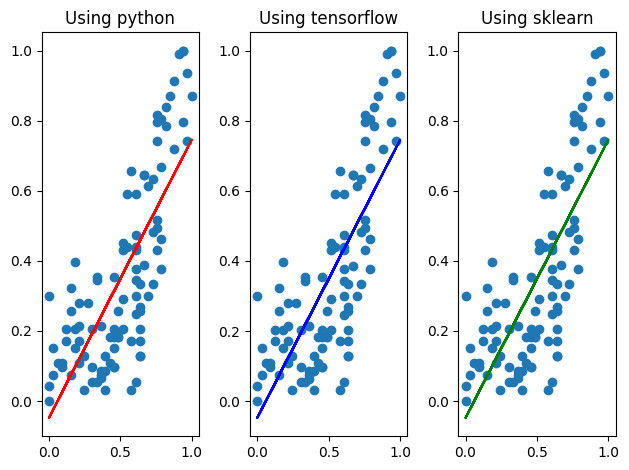

In [ ]:
############################################
## 결과 Graph
############################################

fig = plt.figure()
fig_python = fig.add_subplot(1,3,1)
fig_keras = fig.add_subplot(1,3,2)
fig_sklearn = fig.add_subplot(1,3,3)

fig_python.set_title('Using python')
fig_keras.set_title('Using tensorflow')
fig_sklearn.set_title('Using sklearn')
########################################

fig_python.scatter(x_data_norm,t_data_norm)
fig_python.plot(x_data_norm, x_data_norm*W.ravel() + b, color='r')

fig_keras.scatter(x_data_norm,t_data_norm)
fig_keras.plot(x_data_norm, x_data_norm*weights + biases, color='b')

fig_sklearn.scatter(x_data_norm,t_data_norm)
fig_sklearn.plot(x_data_norm, x_data_norm*model.coef_ + model.intercept_, color='g')

fig.tight_layout()  # subplot간의 간격유지

plt.show()